In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv("breast-cancer-wisconsin.csv")

df, df_validate = np.split(df.sample(frac=1, random_state=0), [int(.8*len(df))])

d:\__STUDIUM\Proseminar-Bagging-Boosting-Ensemble-Learning\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


### Train / Test Split

In [3]:
def create_features(df):
    df = df.copy()

    features = [
        "radius_mean","texture_mean","perimeter_mean","area_mean",
        "smoothness_mean","compactness_mean","concavity_mean",
        "concave points_mean","symmetry_mean","fractal_dimension_mean",
        "radius_se","texture_se","perimeter_se","area_se","smoothness_se",
        "compactness_se","concavity_se","concave points_se","symmetry_se",
        "fractal_dimension_se","radius_worst","texture_worst",
        "perimeter_worst","area_worst","smoothness_worst","compactness_worst",
        "concavity_worst","concave points_worst","symmetry_worst",
        "fractal_dimension_worst",
    ]

    categories = ["diagnosis"]

    for category in categories:
        le = LabelEncoder()
        df[category] = le.fit_transform(df[category])
    
    X = df[features]
    y = df["diagnosis"]

    return X, y

### Create Model

In [4]:
def get_model(max_depth=3):
    model = DecisionTreeClassifier(
        random_state=0,
        max_depth=max_depth
    )
    
    return model

In [5]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)
scores = []

for train_index, test_index in kf.split(df):
    train = df.iloc[train_index]
    test = df.iloc[test_index]

    X_train, y_train = create_features(df=train)
    X_test, y_test = create_features(df=test)

    model = get_model()

    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    scores.append(score)

print(np.average(scores))
print(scores)

0.9251690821256039
[0.9347826086956522, 0.9565217391304348, 0.9782608695652174, 0.9565217391304348, 0.8478260869565217, 0.9111111111111111, 0.8666666666666667, 0.9555555555555556, 0.9111111111111111, 0.9333333333333333]


### Validation

In [6]:
X, y = create_features(df=df)
X_val, y_val = create_features(df=df_validate)

model = get_model()

model.fit(X, y)

model.score(X_val, y_val)

0.9298245614035088

### Plot

In [7]:
from sklearn.metrics import accuracy_score

X, y = create_features(df=df)
X_test, y_test = create_features(df=df_validate)

train_scores = []
test_scores = []
mapping = []

for max_depth in range(1, 31):
    model = get_model(max_depth=max_depth)

    model.fit(X, y)

    train_predictions = model.predict(X)
    test_predictions = model.predict(X_test)

    train_score = accuracy_score(y, train_predictions)
    test_score = accuracy_score(y_test, test_predictions)

    mapping.append(max_depth)
    train_scores.append(train_score)
    test_scores.append(test_score)

    print(f"MaxDepth: {max_depth} | Test score: {train_score:.3f} | Validation score: {test_score:.3f}")


MaxDepth: 1 | Test score: 0.925 | Validation score: 0.877
MaxDepth: 2 | Test score: 0.932 | Validation score: 0.895
MaxDepth: 3 | Test score: 0.965 | Validation score: 0.930
MaxDepth: 4 | Test score: 0.976 | Validation score: 0.965
MaxDepth: 5 | Test score: 0.991 | Validation score: 0.956
MaxDepth: 6 | Test score: 0.996 | Validation score: 0.947
MaxDepth: 7 | Test score: 1.000 | Validation score: 0.965
MaxDepth: 8 | Test score: 1.000 | Validation score: 0.965
MaxDepth: 9 | Test score: 1.000 | Validation score: 0.965
MaxDepth: 10 | Test score: 1.000 | Validation score: 0.965
MaxDepth: 11 | Test score: 1.000 | Validation score: 0.965
MaxDepth: 12 | Test score: 1.000 | Validation score: 0.965
MaxDepth: 13 | Test score: 1.000 | Validation score: 0.965
MaxDepth: 14 | Test score: 1.000 | Validation score: 0.965
MaxDepth: 15 | Test score: 1.000 | Validation score: 0.965
MaxDepth: 16 | Test score: 1.000 | Validation score: 0.965
MaxDepth: 17 | Test score: 1.000 | Validation score: 0.965
MaxDep

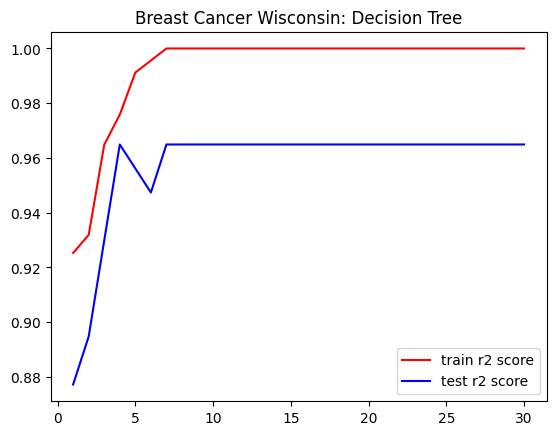

In [8]:
plt.title("Breast Cancer Wisconsin: Decision Tree")
plt.plot(mapping, train_scores, color='red', label='train accuracy')
plt.plot(mapping, test_scores, color='blue', label='test accuracy')

plt.legend()

plt.savefig("figs/bcw_decision-tree.png")
plt.show()